In [182]:
from collections import Counter

In [130]:
import music21 as m21

from music21 import *


In [230]:
import numpy as np
import pandas as pd

In [152]:
piece = m21.converter.parse("./roman.xml")
vocal = piece.parts[0]

In [153]:
vocal.notes.stream().show("text")
#vocalnotes.show("text")
print("hoge")
vocal.show("text")


hoge
{0.0} <music21.instrument.Instrument P1: Synth Pad: Microsoft GS Wavetable Synth>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark allegro Quarter=132.0>
    {0.0} <music21.key.KeySignature of 5 sharps>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Rest rest>
    {2.0} <music21.note.Note D#>
    {2.5} <music21.note.Note E>
    {3.0} <music21.note.Note F#>
    {3.5} <music21.note.Note F#>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.note.Note F#>
    {0.5} <music21.note.Note F#>
    {1.0} <music21.note.Note F#>
    {1.5} <music21.note.Note F#>
    {2.0} <music21.note.Note G#>
    {3.0} <music21.note.Note F#>
    {3.5} <music21.note.Note F#>
{8.0} <music21.stream.Measure 3 offset=8.0>
    {0.0} <music21.note.Note B>
    {0.5} <music21.note.Note B>
    {1.0} <music21.note.Rest rest>
    {1.5} <music21.note.Note B>
    {2.0} <music21.no

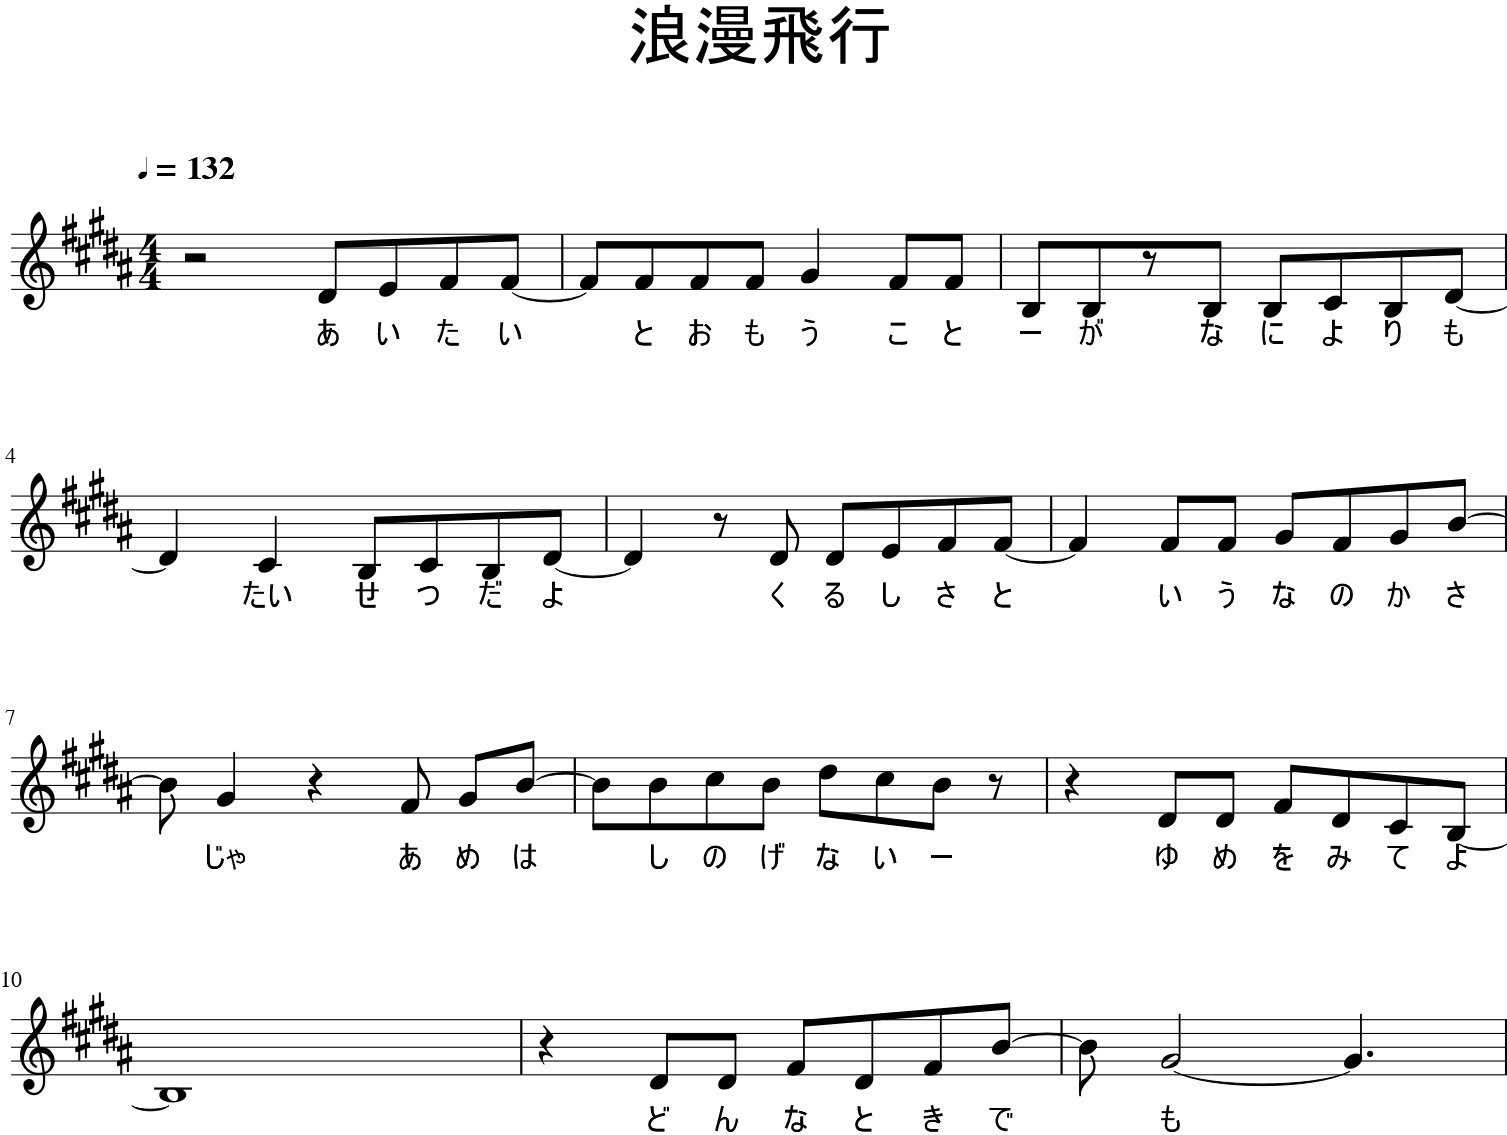

In [158]:
piece.parts[0].show()

In [231]:
"""
音価・音高のペアのオブジェクトを楽譜から作る
タイの部分→連結

"""



record = []
checker = False
#タイがついた場合の途中記録用
pitch_tmp = 0.0
duration_tmp = 0.0
for i in vocal.flat.notesAndRests.stream():
    
    #タイがついている
    if i.tie:
        #タイのはじめの音ならまず音高を記録する
        if checker == False:
            if i.isNote == True:
                #record.append([i.pitch.ps,i.duration.quarterLength])
                pitch_tmp = i.pitch.ps
                duration_tmp += i.duration.quarterLength
            elif i.isRest == True:
                #record.append(["rest",i.duration.quarterLength])
                pitch_tmp = np.inf
                duration_tmp += i.duration.quarterLength
                
        #タイの途中の音なら音長を足していく      
        else:
            duration_tmp += i.duration.quarterLength
            
        #タイはついている   
        checker = True
        
    #タイがついてない    
    else:
        checker = False
        #直前がタイの最後の音ならタイでつながって一音になった音を追加
        if not duration_tmp == 0.0:
            record.append([pitch_tmp,duration_tmp])
            duration_tmp = 0.0
            
        #そうでなければ普通に追加
        if i.isNote == True:
            record.append([i.pitch.ps,i.duration.quarterLength])
        elif i.isRest == True:
            record.append([np.inf,i.duration.quarterLength])

print(record)

[[inf, 2.0], [63.0, 0.5], [64.0, 0.5], [66.0, 0.5], [66.0, 1.0], [66.0, 0.5], [66.0, 0.5], [66.0, 0.5], [68.0, 1.0], [66.0, 0.5], [66.0, 0.5], [59.0, 0.5], [59.0, 0.5], [inf, 0.5], [59.0, 0.5], [59.0, 0.5], [61.0, 0.5], [59.0, 0.5], [63.0, 1.5], [61.0, 1.0], [59.0, 0.5], [61.0, 0.5], [59.0, 0.5], [63.0, 1.5], [inf, 0.5], [63.0, 0.5], [63.0, 0.5], [64.0, 0.5], [66.0, 0.5], [66.0, 1.5], [66.0, 0.5], [66.0, 0.5], [68.0, 0.5], [66.0, 0.5], [68.0, 0.5], [71.0, 1.0], [68.0, 1.0], [inf, 1.0], [66.0, 0.5], [68.0, 0.5], [71.0, 1.0], [71.0, 0.5], [73.0, 0.5], [71.0, 0.5], [75.0, 0.5], [73.0, 0.5], [71.0, 0.5], [inf, 0.5], [inf, 1.0], [63.0, 0.5], [63.0, 0.5], [66.0, 0.5], [63.0, 0.5], [61.0, 0.5], [59.0, 4.5], [inf, 1.0], [63.0, 0.5], [63.0, 0.5], [66.0, 0.5], [63.0, 0.5], [66.0, 0.5], [71.0, 4.5], [inf, 1.0], [63.0, 0.5], [63.0, 0.5], [66.0, 0.5], [63.0, 0.5], [66.0, 0.5], [71.0, 1.0], [71.0, 0.5], [70.0, 0.5], [68.0, 1.0], [66.0, 0.5], [68.0, 0.5], [68.0, 3.0], [70.0, 0.5], [68.0, 0.5], [66.0,

In [233]:
pitch_diff = []
for i in range(len(record)-1):
    pitch_diff.append(record[i+1][0] - record[i][0])
print(pitch_diff)

[-inf, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, -2.0, 0.0, -7.0, 0.0, inf, -inf, 0.0, 2.0, -2.0, 4.0, -2.0, -2.0, 2.0, -2.0, 4.0, inf, -inf, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 2.0, -2.0, 2.0, 3.0, -3.0, inf, -inf, 2.0, 3.0, 0.0, 2.0, -2.0, 4.0, -2.0, -2.0, inf, nan, -inf, 0.0, 3.0, -3.0, -2.0, -2.0, inf, -inf, 0.0, 3.0, -3.0, 3.0, 5.0, inf, -inf, 0.0, 3.0, -3.0, 3.0, 5.0, 0.0, -1.0, -2.0, -2.0, 2.0, 0.0, 2.0, -2.0, -2.0, inf, -inf, 2.0, -2.0, 4.0, 0.0, -4.0, 2.0, 2.0, -2.0, 5.0, -3.0, -2.0, 0.0, -2.0, 0.0, inf, -inf, 0.0, 2.0, 1.0, -1.0, 5.0, 0.0, -5.0, -4.0, inf, nan, -inf, 0.0, 2.0, 2.0, 2.0, 1.0, -1.0, -4.0, 5.0, inf, -inf, -4.0, 2.0, 2.0, -2.0, 5.0, -3.0, -2.0, 0.0, -2.0, 0.0, inf, -inf, 0.0, 2.0, 1.0, -1.0, 0.0, -4.0, inf, nan, -inf, 0.0, 2.0, 2.0, 2.0, 1.0, -1.0, -4.0, 5.0, inf, nan]


### 以下関係ないテストコード群


In [105]:
def make_bigram(list_of_notes):
    

TypeError: getElementsByClass() missing 1 required positional argument: 'classFilterList'

In [77]:
for n in vocal.notesAndRests:
    print(n)

In [133]:
p1 = stream.Part()
k1 = key.KeySignature(0) # key of C
n1 = note.Note('B')
r1 = note.Rest()
c1 = chord.Chord(['A', 'B-'])
p1.append([k1, n1, r1, c1])
p1.show('text')

{0.0} <music21.key.KeySignature of no sharps or flats>
{0.0} <music21.note.Note B>
{1.0} <music21.note.Rest rest>
{2.0} <music21.chord.Chord A B->


In [140]:
noteStream = p1.notes.stream()
noteStream?
noteStream.show('text')

{0.0} <music21.note.Note B>
{2.0} <music21.chord.Chord A B->


In [234]:
piece1 = m21.converter.parse("./cherry.xml")
vocal1 = piece1.parts[0]

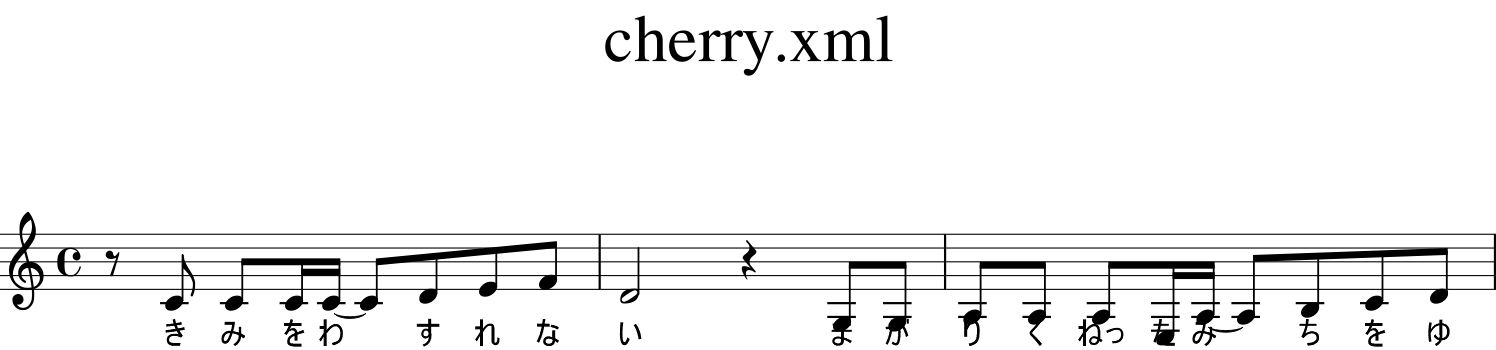

In [240]:
vocal1.measures(10,33).show()

In [243]:
piece2 = m21.converter.parse("./TSUNAMI.xml")
vocal2 = piece2.parts[0]

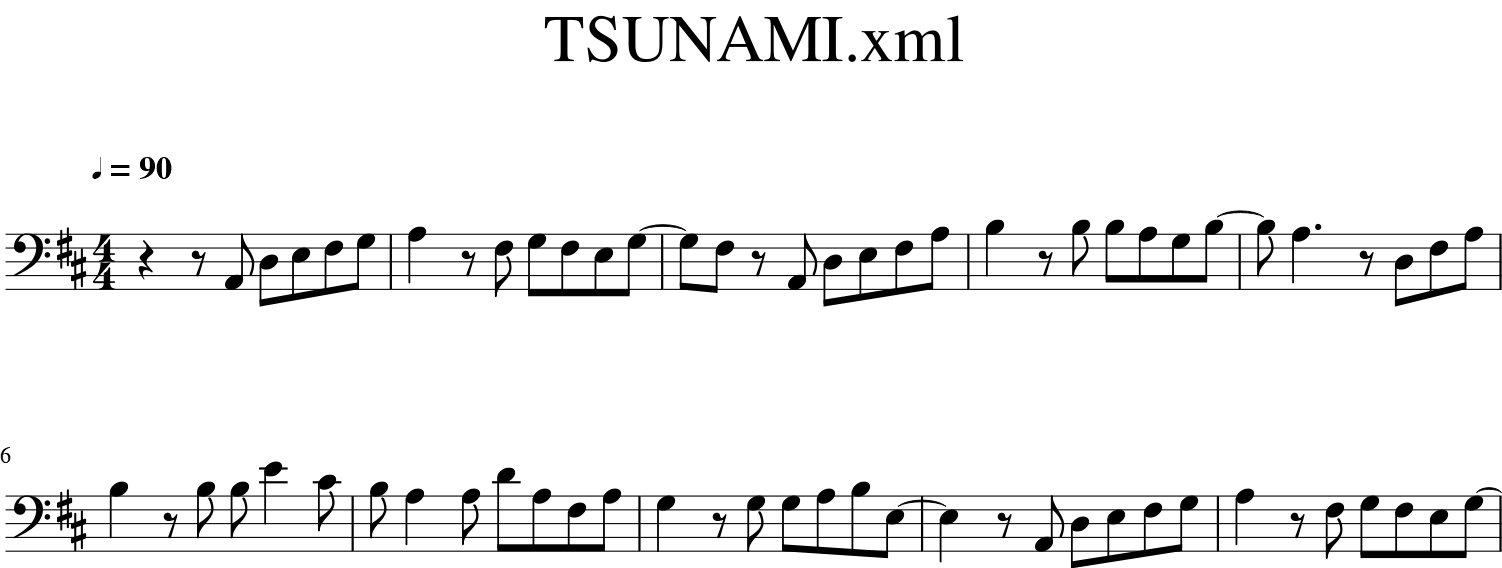

In [245]:
vocal2.show()

In [254]:
def shuukei(vocalpart):
    """
    音価・音高のペアのオブジェクトを楽譜から作る
    タイの部分→連結

    """
    record = []
    checker = False
    #タイがついた場合の途中記録用
    pitch_tmp = 0.0
    duration_tmp = 0.0
    for i in vocalpart.flat.notesAndRests.stream():
        
        #タイがついている
        if i.tie:
            #タイのはじめの音ならまず音高を記録する
            if checker == False:
                if i.isNote == True:
                    #record.append([i.pitch.ps,i.duration.quarterLength])
                    #音符はノート番号
                    pitch_tmp = i.pitch.ps
                    duration_tmp += i.duration.quarterLength
                elif i.isRest == True:
                    #record.append(["rest",i.duration.quarterLength])
                    #休符は無限にする
                    pitch_tmp = np.inf
                    duration_tmp += i.duration.quarterLength
                
            #タイの途中の音なら音長を足していく      
            else:
                duration_tmp += i.duration.quarterLength
            
            #タイはついている   
            checker = True
        
        #タイがついてない    
        else:
            checker = False
            #直前がタイの最後の音ならタイでつながって一音になった音を追加
            if not duration_tmp == 0.0:
                record.append([pitch_tmp,duration_tmp])
                duration_tmp = 0.0
            
            #そうでなければ普通に追加
            if i.isNote == True:
                record.append([i.pitch.ps,i.duration.quarterLength])
            elif i.isRest == True:
                record.append([np.inf,i.duration.quarterLength])

    return record

In [255]:
cherry = shuukei(vocal1)
tsunami = shuukei(vocal2)

In [256]:
tsunami

[[inf, 1.0],
 [inf, 0.5],
 [45.0, 0.5],
 [50.0, 0.5],
 [52.0, 0.5],
 [54.0, 0.5],
 [55.0, 0.5],
 [57.0, 1.0],
 [inf, 0.5],
 [54.0, 0.5],
 [55.0, 0.5],
 [54.0, 0.5],
 [52.0, 0.5],
 [55.0, 1.0],
 [54.0, 0.5],
 [inf, 0.5],
 [45.0, 0.5],
 [50.0, 0.5],
 [52.0, 0.5],
 [54.0, 0.5],
 [57.0, 0.5],
 [59.0, 1.0],
 [inf, 0.5],
 [59.0, 0.5],
 [59.0, 0.5],
 [57.0, 0.5],
 [55.0, 0.5],
 [59.0, 1.0],
 [57.0, 1.5],
 [inf, 0.5],
 [50.0, 0.5],
 [54.0, 0.5],
 [57.0, 0.5],
 [59.0, 1.0],
 [inf, 0.5],
 [59.0, 0.5],
 [59.0, 0.5],
 [64.0, 1.0],
 [61.0, 0.5],
 [59.0, 0.5],
 [57.0, 1.0],
 [57.0, 0.5],
 [62.0, 0.5],
 [57.0, 0.5],
 [54.0, 0.5],
 [57.0, 0.5],
 [55.0, 1.0],
 [inf, 0.5],
 [55.0, 0.5],
 [55.0, 0.5],
 [57.0, 0.5],
 [59.0, 0.5],
 [52.0, 1.5],
 [inf, 0.5],
 [45.0, 0.5],
 [50.0, 0.5],
 [52.0, 0.5],
 [54.0, 0.5],
 [55.0, 0.5],
 [57.0, 1.0],
 [inf, 0.5],
 [54.0, 0.5],
 [55.0, 0.5],
 [54.0, 0.5],
 [52.0, 0.5],
 [55.0, 1.0],
 [54.0, 0.5],
 [inf, 0.5],
 [45.0, 0.5],
 [50.0, 0.5],
 [52.0, 0.5],
 [54.0, 0.5],
 [5

In [258]:
def make_pitch_bigram(shuukei_obj):
    pitch_diff = []
    for i in range(len(shuukei_obj)-1):
        pitch_diff.append(shuukei_obj[i+1][0] - shuukei_obj[i][0])
    return pitch_diff

In [286]:
def delete_inf(bigram_status): 
    del bigram_status[np.inf]
    del bigram_status[-np.inf]


In [259]:
tsunami_pitch_bigram = make_pitch_bigram(tsunami)

In [260]:
tsunami_pitch_bigram


[nan,
 -inf,
 5.0,
 2.0,
 2.0,
 1.0,
 2.0,
 inf,
 -inf,
 1.0,
 -1.0,
 -2.0,
 3.0,
 -1.0,
 inf,
 -inf,
 5.0,
 2.0,
 2.0,
 3.0,
 2.0,
 inf,
 -inf,
 0.0,
 -2.0,
 -2.0,
 4.0,
 -2.0,
 inf,
 -inf,
 4.0,
 3.0,
 2.0,
 inf,
 -inf,
 0.0,
 5.0,
 -3.0,
 -2.0,
 -2.0,
 0.0,
 5.0,
 -5.0,
 -3.0,
 3.0,
 -2.0,
 inf,
 -inf,
 0.0,
 2.0,
 2.0,
 -7.0,
 inf,
 -inf,
 5.0,
 2.0,
 2.0,
 1.0,
 2.0,
 inf,
 -inf,
 1.0,
 -1.0,
 -2.0,
 3.0,
 -1.0,
 inf,
 -inf,
 5.0,
 2.0,
 2.0,
 3.0,
 2.0,
 inf,
 -inf,
 0.0,
 -2.0,
 -2.0,
 4.0,
 -2.0,
 inf,
 -inf,
 4.0,
 3.0,
 2.0,
 inf,
 -inf,
 0.0,
 5.0,
 -3.0,
 -2.0,
 -2.0,
 inf,
 -inf,
 5.0,
 -5.0,
 -3.0,
 3.0,
 -2.0,
 inf,
 -inf,
 -1.0,
 -4.0,
 2.0,
 -2.0,
 inf,
 -inf,
 4.0,
 3.0,
 3.0,
 -2.0,
 0.0,
 inf,
 -inf,
 -1.0,
 -2.0,
 3.0,
 -1.0,
 0.0,
 inf,
 -inf,
 3.0,
 4.0,
 -2.0,
 -2.0,
 -1.0,
 -2.0,
 0.0,
 2.0,
 2.0,
 inf,
 -inf,
 2.0,
 2.0,
 1.0,
 -1.0,
 0.0,
 -2.0,
 0.0,
 inf,
 -inf,
 -2.0,
 -1.0,
 -2.0,
 0.0,
 inf,
 -inf,
 -2.0,
 10.0,
 -1.0,
 -2.0,
 -2.0,
 2.0,
 -2.0,
 inf,
 -

In [267]:
tsunami_pitch_bigram_status = Counter(tsunami_pitch_bigram)

ValueError: If using all scalar values, you must pass an index